### Определение перспективного тарифа для телеком-компании

#### Основная задача

* Составить предварительный анализ тарифов;
* Проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

#### Краткое описание 

В нашем распоряжении данные 500 пользователей "Мегалайна": кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Наша задача провести анализ поведения клиентов и дать комментарии чтобы помочь комерческому департаменту понять какой тариф приносит больше денег и скорректировать рекламный бюджет.

#### План работы

* Откроем и изучим общую информацию о данных;
* Произведем обработку данных;
* Выявим и исправим ошибки в данных; 
* Произведем необходимые расчеты для каждого пользователя;
* Произведем анализ данных;
* Проверим выдвинутые гипотезы; 
* Напишем выводы и дадим рекомендации.

#### Название столбцов

1) Информация о пользователях: (users)
* user_id — уникальный идентификатор пользователя;
* first_name — имя пользователя;
* last_name — фамилия пользователя;
* age — возраст пользователя (годы);
* reg_date — дата подключения тарифа (день, месяц, год);
* churn_date — дата прекращения пользования тарифом;
* city — город проживания пользователя;
* tariff — название тарифного плана.

2) Информация о звонках: (calls)
* id — уникальный номер звонка;
* call_date — дата звонка;
* duration — длительность звонка в минутах;
* user_id — идентификатор пользователя, сделавшего звонок.

3) Информация о сообщениях: (messages)
* id — уникальный номер сообщения;
* message_date — дата сообщения;
* user_id — идентификатор пользователя, отправившего сообщение.

4) Информация об интернет-сессиях: (internet)
* id — уникальный номер сессии;
* mb_used —  объём потраченного за сессию интернет-трафика (в мегабайтах);
* session_date — дата интернет-сессии;
* user_id — идентификатор пользователя.

5) Информация о тарифах: (tariffs)
* tariff_name — название тарифа;
* rub_monthly_fee — ежемесячная абонентская плата в рублях;
* minutes_included — количество минут разговора в месяц, включённых в абонентскую плату;
* messages_included — количество сообщений в месяц, включённых в абонентскую плату;
* mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах);
* rub_per_minute — стоимость минуты разговора сверх тарифного пакета;
* rub_per_message — стоимость отправки сообщения сверх тарифного пакета;
* rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета.

### Обзор данных

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns
from math import factorial
from scipy import stats as st
from datetime import datetime

In [2]:
# получаем данные для исследования 
path = 'C:\\Users\\tbyni\\Рабочий стол\\Проекты ЯП_ДА\\Яндекс_10ый_проект_ДА\\'
users = pd.read_csv(path + 'users.csv', sep = ',')
calls = pd.read_csv(path + 'calls.csv', sep = ',')
messages = pd.read_csv(path + 'messages.csv', sep = ',')
internet = pd.read_csv(path + 'internet.csv', sep = ',')
tariffs = pd.read_csv(path + 'tariffs.csv', sep = ',')

In [3]:
# просмотрим общую информацию о данных 
def information (a, b, c, d, e):
    display(a.head(20))
    display(b.head(5))
    display(c.head(5))
    display(d.head(5))
    display(e.head(5))
    display(a.info())
    display(b.info())
    display(c.info())
    display(d.info())
    display(e.info())
    display(a.isna().sum())
    display(b.isna().sum())
    display(c.isna().sum())
    display(d.isna().sum())
    display(e.isna().sum())
information(users, calls, messages, internet, tariffs)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

id           0
call_date    0
duration     0
user_id      0
dtype: int64

id              0
message_date    0
user_id         0
dtype: int64

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

In [4]:
# проверяем данные в users на наличие дубликатов 
users.duplicated().sum()

0

In [5]:
# проверяем данные в calls на наличие дубликантов
calls.duplicated().sum()

0

In [6]:
# проверяем данные в messages на наличие дубликатов 
messages.duplicated().sum()

0

In [7]:
# проверяем данные в internet на наличие дубликатов
internet.duplicated().sum()

0

In [8]:
# проверяем данные в tariffs на наличие дубликатов 
tariffs.duplicated().sum()

0

In [9]:
# просматриваем уникальные значения
users['city'].value_counts().head(20)

Москва              99
Санкт-Петербург     39
Новосибирск         16
Омск                14
Казань              14
Уфа                 12
Краснодар           11
Набережные Челны    11
Ульяновск           11
Екатеринбург        11
Челябинск            9
Самара               9
Нижний Новгород      8
Волгоград            8
Пермь                8
Улан-Удэ             7
Новокузнецк          7
Вологда              7
Красноярск           7
Сочи                 6
Name: city, dtype: int64

In [10]:
# просматриваем уникальные значения
users['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

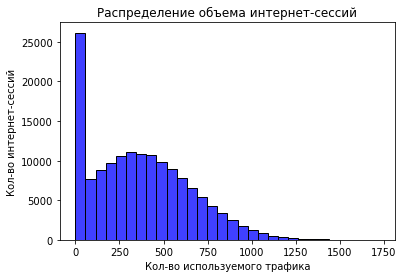

In [11]:
# просматриваем распределения объема интернет-сессий
sns.histplot(internet['mb_used'], kde=False, 
             bins=int(30720/1024), color = 'blue')
ax = sns.histplot()
ax.set_xlabel('Кол-во используемого трафика')
ax.set_ylabel('Кол-во интернет-сессий')
ax.set_title('Распределение объема интернет-сессий')
plt.show()

Как мы можем заметить по гистограмме, что большинство интернет-сессий находится в пределах 1гб, однако стоит отметить, что потом кол-во значений резко снижается. 

#### Вывод 

- Просматривая данные выделим следующее: 
 * Для исследования получены 5 таблиц (users (8 столбцов и 500 строк), calls (4 столбца и 202607 строк), messages (3 столбца и 123036 строк), internet (5 столбцов и 149396 строк), tariffs(2 столбца и 2 строки))
 * Пропущенные значения в столбце churn_date (датафрейм users). Всего пропущенных значений - 462. Как мы знаем связано с тем, что в данном столбце появляются данные после окончания пользования тарифом 
 * В данных отсутствуют дубликаты 
 * Неверные форматы данных в следующих таблицах: users (churn_date, reg_date), calls (call_date), messages (message_date), internet (session_date)
 * Отметим нули в столбце duration, таблицы calls
 
- Проведем обработку данных: 
 * Пропущенные данные в churn_date заполним нынешней датой и преобразуем в формат datetime
 * Изменим форматы данных в users (churn_date, reg_date), calls (call_date), messages (message_date), internet (session_date) на datetime

### Предобработка данных

In [12]:
# меняем формат данных на корректный 
users['reg_date'] = pd.to_datetime(users['reg_date'], format = '%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format = '%Y-%m-%d')
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
internet['session_date'] = pd.to_datetime(internet['session_date'], format = '%Y-%m-%d')

In [13]:
# выделим столбец с месяцем
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
internet['month'] = internet['session_date'].dt.month

In [14]:
# просмотрим изменения
information(users, calls, messages, internet, tariffs)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaT,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaT,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaT,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaT,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaT,Пермь,Василиса,Блинова,2018-03-22,smart


,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
 4   month      202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.7+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
 3   month         123036 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
 5   month         149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 6.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

id           0
call_date    0
duration     0
user_id      0
month        0
dtype: int64

id              0
message_date    0
user_id         0
month           0
dtype: int64

Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
month           0
dtype: int64

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

*** Количество сделанных звонков и израсходованных минут разговора по месяцам ***

In [15]:
# округлим минуты в большую сторону
calls['duration'] = np.ceil(calls['duration'])
# check 
# calls.loc[calls['duration'] > 0].sort_values(by = 'duration', ascending = True).head(20)

In [16]:
# таблица с кол-вом сделанных звонков и израсходованных минут разговора по месяцам
amount_calls_duration = calls.pivot_table(index = ['user_id', 'month'],
                                       values = ['duration', 'id'],
                                       aggfunc = {'duration' : 'sum', 'id' : 'count'})
amount_calls_duration.columns = ['duration' , 'am_calls']
amount_calls_duration.head(10)

duration  am_calls
user_id month                    
1000    5         159.0        22
        6         172.0        43
        7         340.0        47
        8         408.0        52
        9         466.0        58
        10        350.0        57
        11        338.0        43
        12        333.0        46
1001    11        430.0        59
        12        414.0        63

In [17]:
# check
amount_calls_duration.head(2)

duration  am_calls
user_id month                    
1000    5         159.0        22
        6         172.0        43

*** Количество отправленных сообщений по месяцам ***

In [18]:
# таблица с кол-вом отправленных сообщений по месяцам
amount_messages = messages.pivot_table(index = ['user_id', 'month'],
                                       values = ['id'],
                                       aggfunc = {'id' : 'count'})
amount_messages.columns = ['am_messages']
amount_messages.head(2)

am_messages
user_id month             
1000    5               22
        6               60

*** Количество использованного трафика мб ***

In [19]:
# округлим минуты в большую сторону
internet['mb_used'] = np.ceil(internet['mb_used'])
# check 
# internet.loc[internet['mb_used'] > 0].sort_values(by = 'mb_used', ascending = True).head(20)

In [20]:
# получим таблицу с объемом израсходованного интернет-трафика по месяцам
amount_inet_traffic = internet.pivot_table(index = ['user_id', 'month'],
                                           values = ['mb_used'],
                                           aggfunc = {'mb_used' : 'sum'})
amount_inet_traffic.columns = ['am_traffic']
amount_inet_traffic.head(20)

am_traffic
user_id month            
1000    5          2256.0
        6         23257.0
        7         14016.0
        8         14070.0
        9         14581.0
        10        14717.0
        11        14768.0
        12         9827.0
1001    11        18452.0
        12        14053.0
1002    6         10871.0
        7         17601.0
        8         20347.0
        9         16712.0
        10        13905.0
        11        18610.0
        12        18137.0
1003    8          8571.0
        9         12479.0
        10        14779.0

Далее собирем общую таблицу чтобы посчитать помесячную выручку для каждого пользователя

In [21]:
# получим общую таблицу для подсчетов с указанием тарифа и округлим в большую сторону мб
table_first = pd.merge(amount_calls_duration, amount_messages, on = ['user_id', 'month'], how = 'outer')
table_second = pd.merge(table_first, amount_inet_traffic, on = ['user_id', 'month'], how = 'outer')
for i in table_second.index:
    table_second.loc[i, 'tariff'] = users.loc[i[0] - 1000, 'tariff']
    table_second.loc[i, 'city'] = users.loc[i[0] - 1000, 'city']
table_second.head(20)

duration  am_calls  am_messages  am_traffic tariff         city
user_id month                                                                 
1000    5         159.0      22.0         22.0      2256.0  ultra    Краснодар
        6         172.0      43.0         60.0     23257.0  ultra    Краснодар
        7         340.0      47.0         75.0     14016.0  ultra    Краснодар
        8         408.0      52.0         81.0     14070.0  ultra    Краснодар
        9         466.0      58.0         57.0     14581.0  ultra    Краснодар
        10        350.0      57.0         73.0     14717.0  ultra    Краснодар
        11        338.0      43.0         58.0     14768.0  ultra    Краснодар
        12        333.0      46.0         70.0      9827.0  ultra    Краснодар
1001    11        430.0      59.0          NaN     18452.0  smart       Москва
        12        414.0      63.0          NaN     14053.0  smart       Москва
1002    6         117.0      15.0          4.0     10871.0  smart  Стерлитамак
        7         214.0      26.0         11.0     17601.0  smart  Стерлитамак
        8         289.0      42.0         13.0     20347.0  smart  Стерлитамак
        9         206.0      36.0          4.0     16712.0  smart  Стерлитамак
        10        212.0      33.0         10.0     13905.0  smart  Стерлитамак
        11        243.0      32.0         16.0     18610.0  smart  Стерлитамак
        12        236.0      33.0         12.0     18137.0  smart  Стерлитамак
1003    8         380.0      55.0         37.0      8571.0  ultra       Москва
        9         961.0     134.0         91.0     12479.0  ultra       Москва
        10        855.0     108.0         83.0     14779.0  ultra       Москва

#### check

In [22]:
# check
table_second.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1476, 4)
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   duration     3174 non-null   float64
 1   am_calls     3174 non-null   float64
 2   am_messages  2717 non-null   float64
 3   am_traffic   3203 non-null   float64
 4   tariff       3214 non-null   object 
 5   city         3214 non-null   object 
dtypes: float64(4), object(2)
memory usage: 309.7+ KB


После получения общей таблицы необходимо провести проверку полученных данных

In [23]:
# просматриваем данные по таблице 
def function (a):
    display(a.sample(20))
    display(a.info())
    display(a.isna().sum())
function(table_second)

,,duration,am_calls,am_messages,am_traffic,tariff,city
user_id,month,,,,,,
1393,12,651.0,85.0,59.0,17391.0,smart,Краснодар
1325,6,305.0,52.0,7.0,11671.0,ultra,Новосибирск
1402,12,596.0,87.0,22.0,26298.0,ultra,Пенза
1400,8,200.0,21.0,9.0,7424.0,smart,Москва
1067,7,383.0,51.0,63.0,5785.0,smart,Москва
1410,10,449.0,56.0,22.0,20898.0,smart,Нижний Тагил
1120,3,279.0,44.0,NaN,12763.0,ultra,Краснодар
1076,3,297.0,49.0,73.0,15807.0,smart,Уфа
1482,11,265.0,40.0,72.0,14608.0,smart,Санкт-Петербург


<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1476, 4)
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   duration     3174 non-null   float64
 1   am_calls     3174 non-null   float64
 2   am_messages  2717 non-null   float64
 3   am_traffic   3203 non-null   float64
 4   tariff       3214 non-null   object 
 5   city         3214 non-null   object 
dtypes: float64(4), object(2)
memory usage: 309.7+ KB


None

duration        40
am_calls        40
am_messages    497
am_traffic      11
tariff           0
city             0
dtype: int64

Как мы можем увидеть, что в столбцах: am_messages, am_traffic, duration, am_calls есть пропущенные значения, можем предположить, что пользователь просто не пользовался данной функцией, поэтому заменим пропущенные значения нулями. 

In [24]:
# заменяем пропущенные значения нулями
table_second['duration'] = table_second['duration'].fillna(0)
table_second['am_calls'] = table_second['am_calls'].fillna(0)
table_second['am_messages'] = table_second['am_messages'].fillna(0)
table_second['am_traffic'] = table_second['am_traffic'].fillna(0)

Далее нам необходимо посчитать помесячную выручку для каждого пользователя, по следующей формуле: вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану

In [25]:
# для каждого тарифа посчитаем отдельно выручку 
def month_transaction(row):
    duration = row['duration']
    am_messages = row['am_messages']
    mb = row['am_traffic']
    tariff = row['tariff']
    
    if tariff == 'smart': 
        minutes_cost = max(row['duration'] - tariffs.loc[0, 'minutes_included'], 0)
        messages_cost = max(row['am_messages'] - tariffs.loc[0, 'messages_included'], 0)
        traffic_cost = np.ceil(max(row['am_traffic'] - tariffs.loc[0, 'mb_per_month_included'], 0) / 1024)
        
        return (tariffs.loc[0, 'rub_per_minute'] * minutes_cost + 
                   tariffs.loc[0, 'rub_per_message'] * messages_cost + 
                   tariffs.loc[0, 'rub_per_gb'] * traffic_cost + 
                   tariffs.loc[0, 'rub_monthly_fee']
                  ) 
    else:
        minutes_cost = max(row['duration'] - tariffs.loc[1, 'minutes_included'], 0)
        messages_cost = max(row['am_messages'] - tariffs.loc[1, 'messages_included'], 0)
        traffic_cost = np.ceil(max(row['am_traffic'] - tariffs.loc[1, 'mb_per_month_included'], 0) / 1024)
        
    return (tariffs.loc[1, 'rub_per_minute'] * minutes_cost + 
                   tariffs.loc[1, 'rub_per_message'] * messages_cost + 
                   tariffs.loc[1, 'rub_per_gb'] * traffic_cost + 
                   tariffs.loc[1, 'rub_monthly_fee']
                  ) 

table_second['total_profit'] = table_second.apply(month_transaction, axis=1) 

In [26]:
# просмотрим полученный рез-тат
table_second.reset_index(inplace=True)
table_second[table_second.user_id == 1499]

,user_id,month,duration,am_calls,am_messages,am_traffic,tariff,city,total_profit
3170,1499,9,70.0,9.0,11.0,1848.0,smart,Пермь,550.0
3171,1499,10,449.0,68.0,48.0,17809.0,smart,Пермь,1150.0
3172,1499,11,612.0,74.0,59.0,17984.0,smart,Пермь,1513.0
3173,1499,12,492.0,69.0,66.0,13077.0,smart,Пермь,598.0


In [27]:
# check
table_second[table_second.user_id == 1499][['user_id', 'month', 'tariff', 
          'duration', 'am_messages', 'am_traffic', 
          'total_profit']].tail()

,user_id,month,tariff,duration,am_messages,am_traffic,total_profit
3170,1499,9,smart,70.0,11.0,1848.0,550.0
3171,1499,10,smart,449.0,48.0,17809.0,1150.0
3172,1499,11,smart,612.0,59.0,17984.0,1513.0
3173,1499,12,smart,492.0,66.0,13077.0,598.0


#### check func

In [28]:
# пример функции 

def month_transaction(row):
    
    if row['tariff'] == 'smart': 
        minutes_cost = max(row['duration'] - tariffs.loc[0, 'minutes_included'], 0) * tariffs.loc[0, 'rub_per_minute']
    
    else:
        minutes_cost = max(row['duration'] - tariffs.loc[1, 'minutes_included'], 0) * tariffs.loc[1, 'rub_per_minute']
    
    return minutes_cost

table_second['minutes_cost'] = table_second.apply(month_transaction, axis=1) 
table_second[table_second.user_id == 1499]

,user_id,month,duration,am_calls,am_messages,am_traffic,tariff,city,total_profit,minutes_cost
3170,1499,9,70.0,9.0,11.0,1848.0,smart,Пермь,550.0,0.0
3171,1499,10,449.0,68.0,48.0,17809.0,smart,Пермь,1150.0,0.0
3172,1499,11,612.0,74.0,59.0,17984.0,smart,Пермь,1513.0,336.0
3173,1499,12,492.0,69.0,66.0,13077.0,smart,Пермь,598.0,0.0


In [29]:
# просмотрим прибыль по тарифам
temporary_table = table_second.groupby('tariff')['total_profit'].sum()
temporary_table

tariff
smart    2885751.0
ultra    2040000.0
Name: total_profit, dtype: float64

In [30]:
# check

print('{:,.0f}'.format(table_second['total_profit'].sum()))

4,925,751


In [31]:
# check
table_second[table_second.user_id == 1499][['user_id', 'month', 'tariff', 
          'duration', 'am_messages', 'am_traffic', 
          'total_profit']].tail()

,user_id,month,tariff,duration,am_messages,am_traffic,total_profit
3170,1499,9,smart,70.0,11.0,1848.0,550.0
3171,1499,10,smart,449.0,48.0,17809.0,1150.0
3172,1499,11,smart,612.0,59.0,17984.0,1513.0
3173,1499,12,smart,492.0,66.0,13077.0,598.0


#### Вывод

* Получили данные по прибыли для каждого пользователя с учетом сверхприбыли;
* Смарт приносит больше общей прибыли нежели, ультра.

Построим гистограммы, чтобы описать поведение клиентов оператора. Оценим сколько сколько минут разговора, сколько сообщений и какой объем интернет-трафика требуется пользователям каждого тарифа в месяц. Посчитаем среднее кол-во, дисперсию и стандартное отклонение. 

### Анализ данных

In [32]:
# посчитаем среднее, дисперсию и стандартное отклонение.
mean_var_std_gip = table_second.pivot_table(index = ['tariff'], values = ['duration', 'am_messages', 'am_traffic'],
                                            aggfunc = {'duration' : [np.median, np.var, np.std, np.mean],
                                                      'am_messages' : [np.median, np.var, np.std, np.mean],
                                                      'am_traffic' : [np.median, np.var, np.std]})
mean_var_std_gip = round(mean_var_std_gip, 2)
mean_var_std_gip

am_messages                        am_traffic                          \
              mean median    std      var     median       std           var   
tariff                                                                         
smart        33.38   28.0  28.23   796.81    16531.0   5877.58  3.454591e+07   
ultra        49.36   38.0  47.80  2285.27    19324.0  10096.32  1.019356e+08   

       duration                            
           mean median     std        var  
tariff                                     
smart    417.93  422.0  190.31   36219.32  
ultra    526.62  518.0  317.61  100873.63

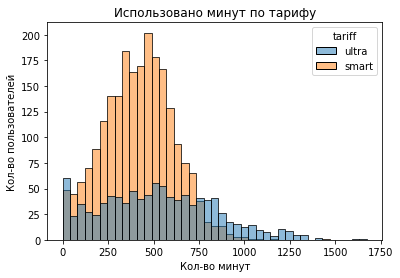

In [33]:
# просматриваем гистограмму по кол-ву использованных минут по тарифам
sns.histplot(data=table_second, x='duration', hue='tariff', ax = None)
ax = sns.histplot()
ax.set_xlabel('Кол-во минут')
ax.set_ylabel('Кол-во пользователей')
ax.set_title('Использовано минут по тарифу')
plt.show()

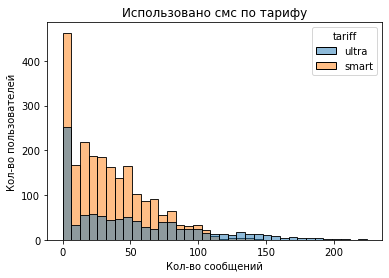

In [34]:
# просматриваем гистограмму по кол-ву использования сообщений по тарифам
sns.histplot(data=table_second, x='am_messages', hue='tariff')
ax = sns.histplot()
ax.set_xlabel('Кол-во сообщений')
ax.set_ylabel('Кол-во пользователей')
ax.set_title('Использовано смс по тарифу')
plt.show()

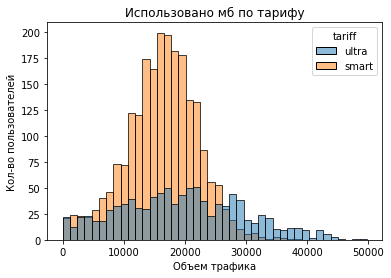

In [35]:
# просматриваем гистограмму по кол-ву использования трафика 
sns.histplot(data=table_second, x='am_traffic', hue='tariff')
ax = sns.histplot()
ax.set_xlabel('Объем трафика')
ax.set_ylabel('Кол-во пользователей')
ax.set_title('Использовано мб по тарифу')
plt.show()

- Отметим следующее: 
 * Пик кол-ва минут по тарифу смарт приходится, как раз на лимит в промежутке 400-500 минут, далее начинается снижение. Ярко выраженного пика по тарифу ультра не наблюдаем, т.к на мой взгляд пользователи данного не контролируют расход минут так тщательно, как пользователи тарифа смарт;
 * Отметим, что подавляющее кол-во пользователей отправляют до 5 смс, большинство пользователей тарифа смарт укладываются в лимит 50 смс, далее показатели падают. Пользователи тарифа ультра после пика в 5 смс не показывают каких-то особых всплесков; 
 * Как и ранее указывали на тарифе смарт наблюдаем ярковыраженный пик в районе 16 гб с последующим снижением;
 * Отметим, что данные по объему мб и звонкам имеют нормальное распределение по графикам, тогда как график с данным по использованным смс скошен вправо.
 
- Из вышесказанного отметим, что пользователи тарифа ультра практически всегда находятся в лимите в отличие от пользователей тарифа смарт;
- Можем предположить ввиду отсутствия, каких-либо значительных пиков у пользователей тарифа ультра, то данные пользователи более свободны.

### Проверка гипотез 

#### Cредняя выручка пользователей тарифов "Ультра" и "Смарт" различаются 

- H₀ - средняя выручка пользователей тарифа "ультра" равна средней выручке пользователей тарифа "cмарт"
- H₁ - средняя выручка пользователей тарифа "ультра" и тарифа "смарт" различаются
- Критический уровень статистической значимости = .05

In [36]:
# проверяем гипотезу
ultra = table_second.query('tariff == "ultra"')['total_profit']
smart = table_second.query('tariff == "smart"')['total_profit']
alpha = .05

results = st.ttest_ind(
    smart, 
    ultra)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.9776448000521676e-158
Отвергаем нулевую гипотезу


In [37]:
# формируем среднее по каждому тарифу
table_second.pivot_table(index = 'tariff', values = ['total_profit', 'user_id'],
                         aggfunc = {'total_profit' : 'median',
                                    'user_id' : 'count'})

,total_profit,user_id
tariff,,
smart,1038.0,2229
ultra,1950.0,985


- Средняя выручка по тарифам различается в 2 раза, тариф ультра значительно впереди
- Отметим, что пользователи по тарифу смарт значительно превышают лимит по тратам 

In [38]:
# просматриваем пользователи какого тарифа превышают лимит больше 
smarts =  round((table_second.query('total_profit > 550' and 'tariff in ("smart")').count() / table_second.count())*100, 2)
ultra = round((table_second.query('total_profit > 1950' and 'tariff in ("ultra")').count() / table_second.count())*100, 2)
print(f"Клиенты превышающие лимиты на тарифе Смарт: {smarts['user_id']} %")
print(f"Клиенты превышающие лимиты на тарифе Ультра: {ultra['user_id']} %")

Клиенты превышающие лимиты на тарифе Смарт: 69.35 %
Клиенты превышающие лимиты на тарифе Ультра: 30.65 %


Как мы можем заметить пользователи тарифа смарт практически в 70% превышают установленный лимит.

#### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

- H₀ - средняя выручка пользователей из Москвы равна выручке пользователей из других регионов
- H₁ - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
- Критический уровень статистической значимости = .05

In [39]:
# выделим пользователей по городам 
moscow_users = table_second[(table_second['city'] == 'Москва')]
another_users = table_second[(table_second['city'] != 'Москва')]

In [40]:
# проверяем гипотезы
moscow = moscow_users['total_profit']
another = another_users['total_profit']
alpha = .05

results = st.ttest_ind(moscow, another)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.531666503831252
Не получилось отвергнуть нулевую гипотезу


In [41]:
# func
def regions(city):
    if city == 'Москва': return 'Москва'
    else: return 'Регионы'
    
table_second['region'] = table_second['city'].apply(regions)
table_second.pivot_table(index='region', values='total_profit', aggfunc='median')

,total_profit
region,
Москва,1750.0
Регионы,1587.0


Получив медианные значения можем заметить, что выручка в Москве незначительно больше. Отметим, что данный тест не дал возможности нам отвергнуть нулевую гипотезу, т.к практически в 47% мы бы получили ошибку.

### Общий вывод

- Согласно выборке наибольшее кол-во пользователей предпочитают тариф смарт
- Больше всего доп. тратам подвержены пользователи тарифа смарт
- Наибольшую доп. прибыль приносит интернет
- Пользователи тарифа ультра практически не не выходят за пределы своего тарифа
- Отметим низкую активность при отправке смс, думаю можем это связать с развитием меседжеров
- Прибыль от тарифа смарт значительно больше за счет кол-ва пользователей, хоть и средняя выручка по тарифу ультра значительно больше
- Разница в выручке Москвы и остальных регионов незначительна

Пользователи тарифа смарт в среднем приносят - 958 руб., тогда как пользователи ультра - 1950 руб.
Кол-во пользователей смарт - 2229, пользователей тарифа ультра - 985. Прибыль по тарифу смарт не столь высока в сравнение с кол-вом пользователей. 

Исходя из цифр выше можем предложить сделать упор на пользователях тарифа ультра, несмотря на то что общая прибыль тарифа смарт выше (2885751), по сравнению с пользователями тарифа ультра (2040000), кол-во пользователей тарифа смарт больее чем в 2 раза и 70% превышают свой лимит, предложив например им скидку на обслуживание в первые 3 месяца в дальнейшем мы сможем дополучить прибыль по тарифу ультра. 